In [138]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [139]:
df = pd.read_csv('insurance.csv')

In [140]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

In [141]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [142]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [144]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [145]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [146]:
numeric=df[['age','bmi','children','charges']]
numeric

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


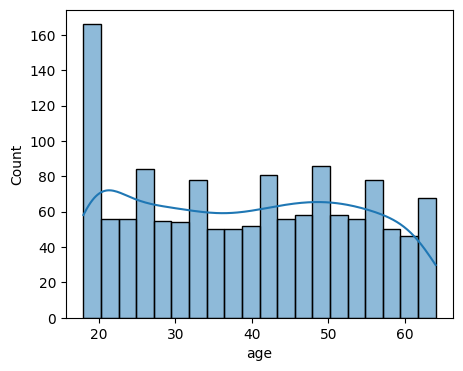

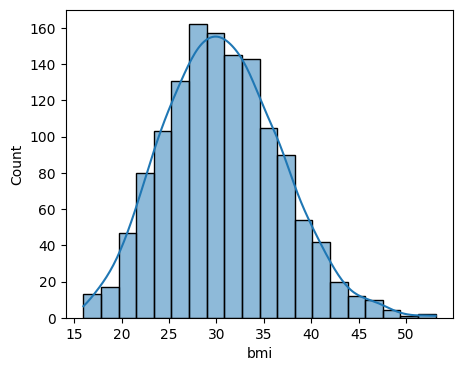

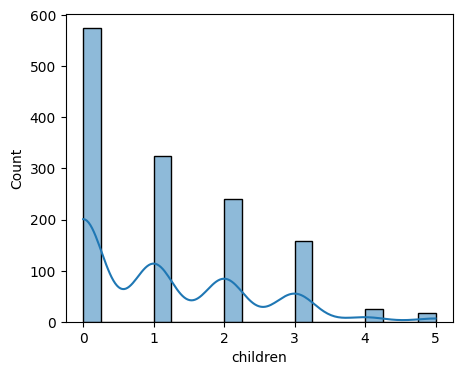

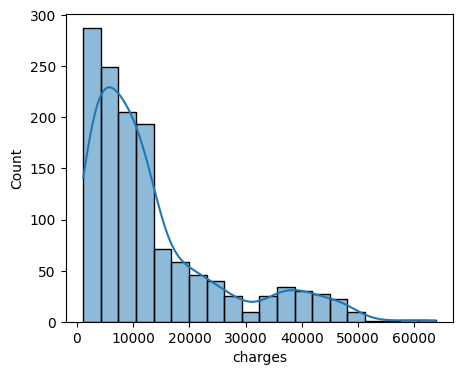

In [147]:
for cols in numeric:
    plt.figure(figsize=(5,4))
    sns.histplot(df[cols],kde=True,bins=20)

<Axes: xlabel='children', ylabel='count'>

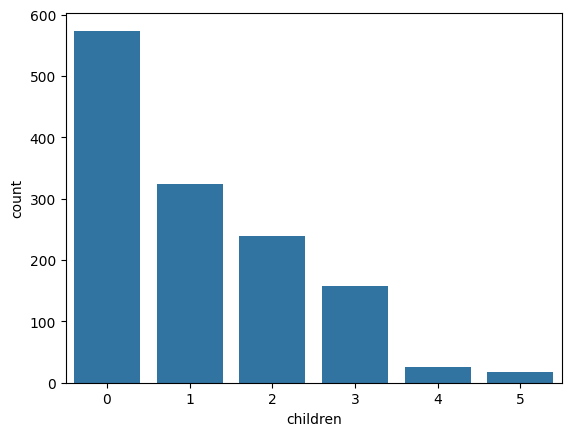

In [148]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

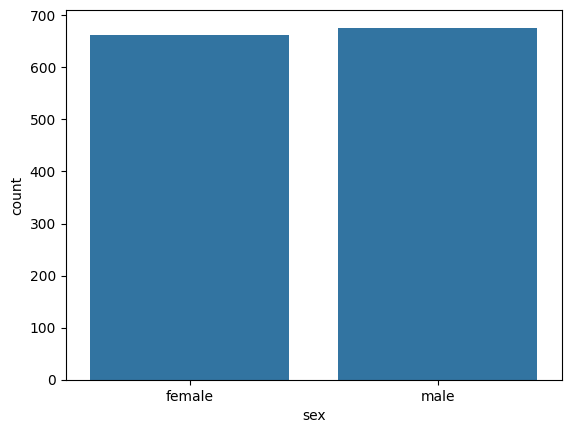

In [149]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

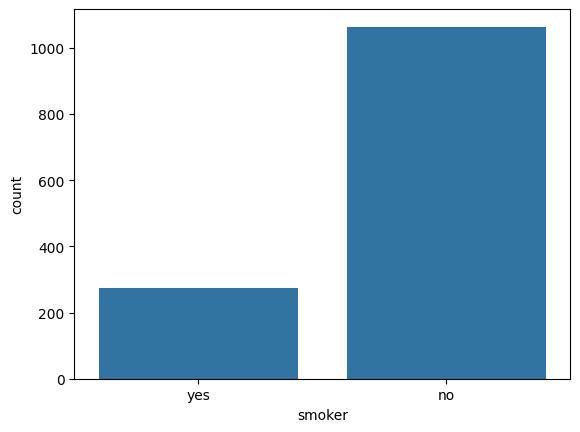

In [150]:
sns.countplot(x=df['smoker'])

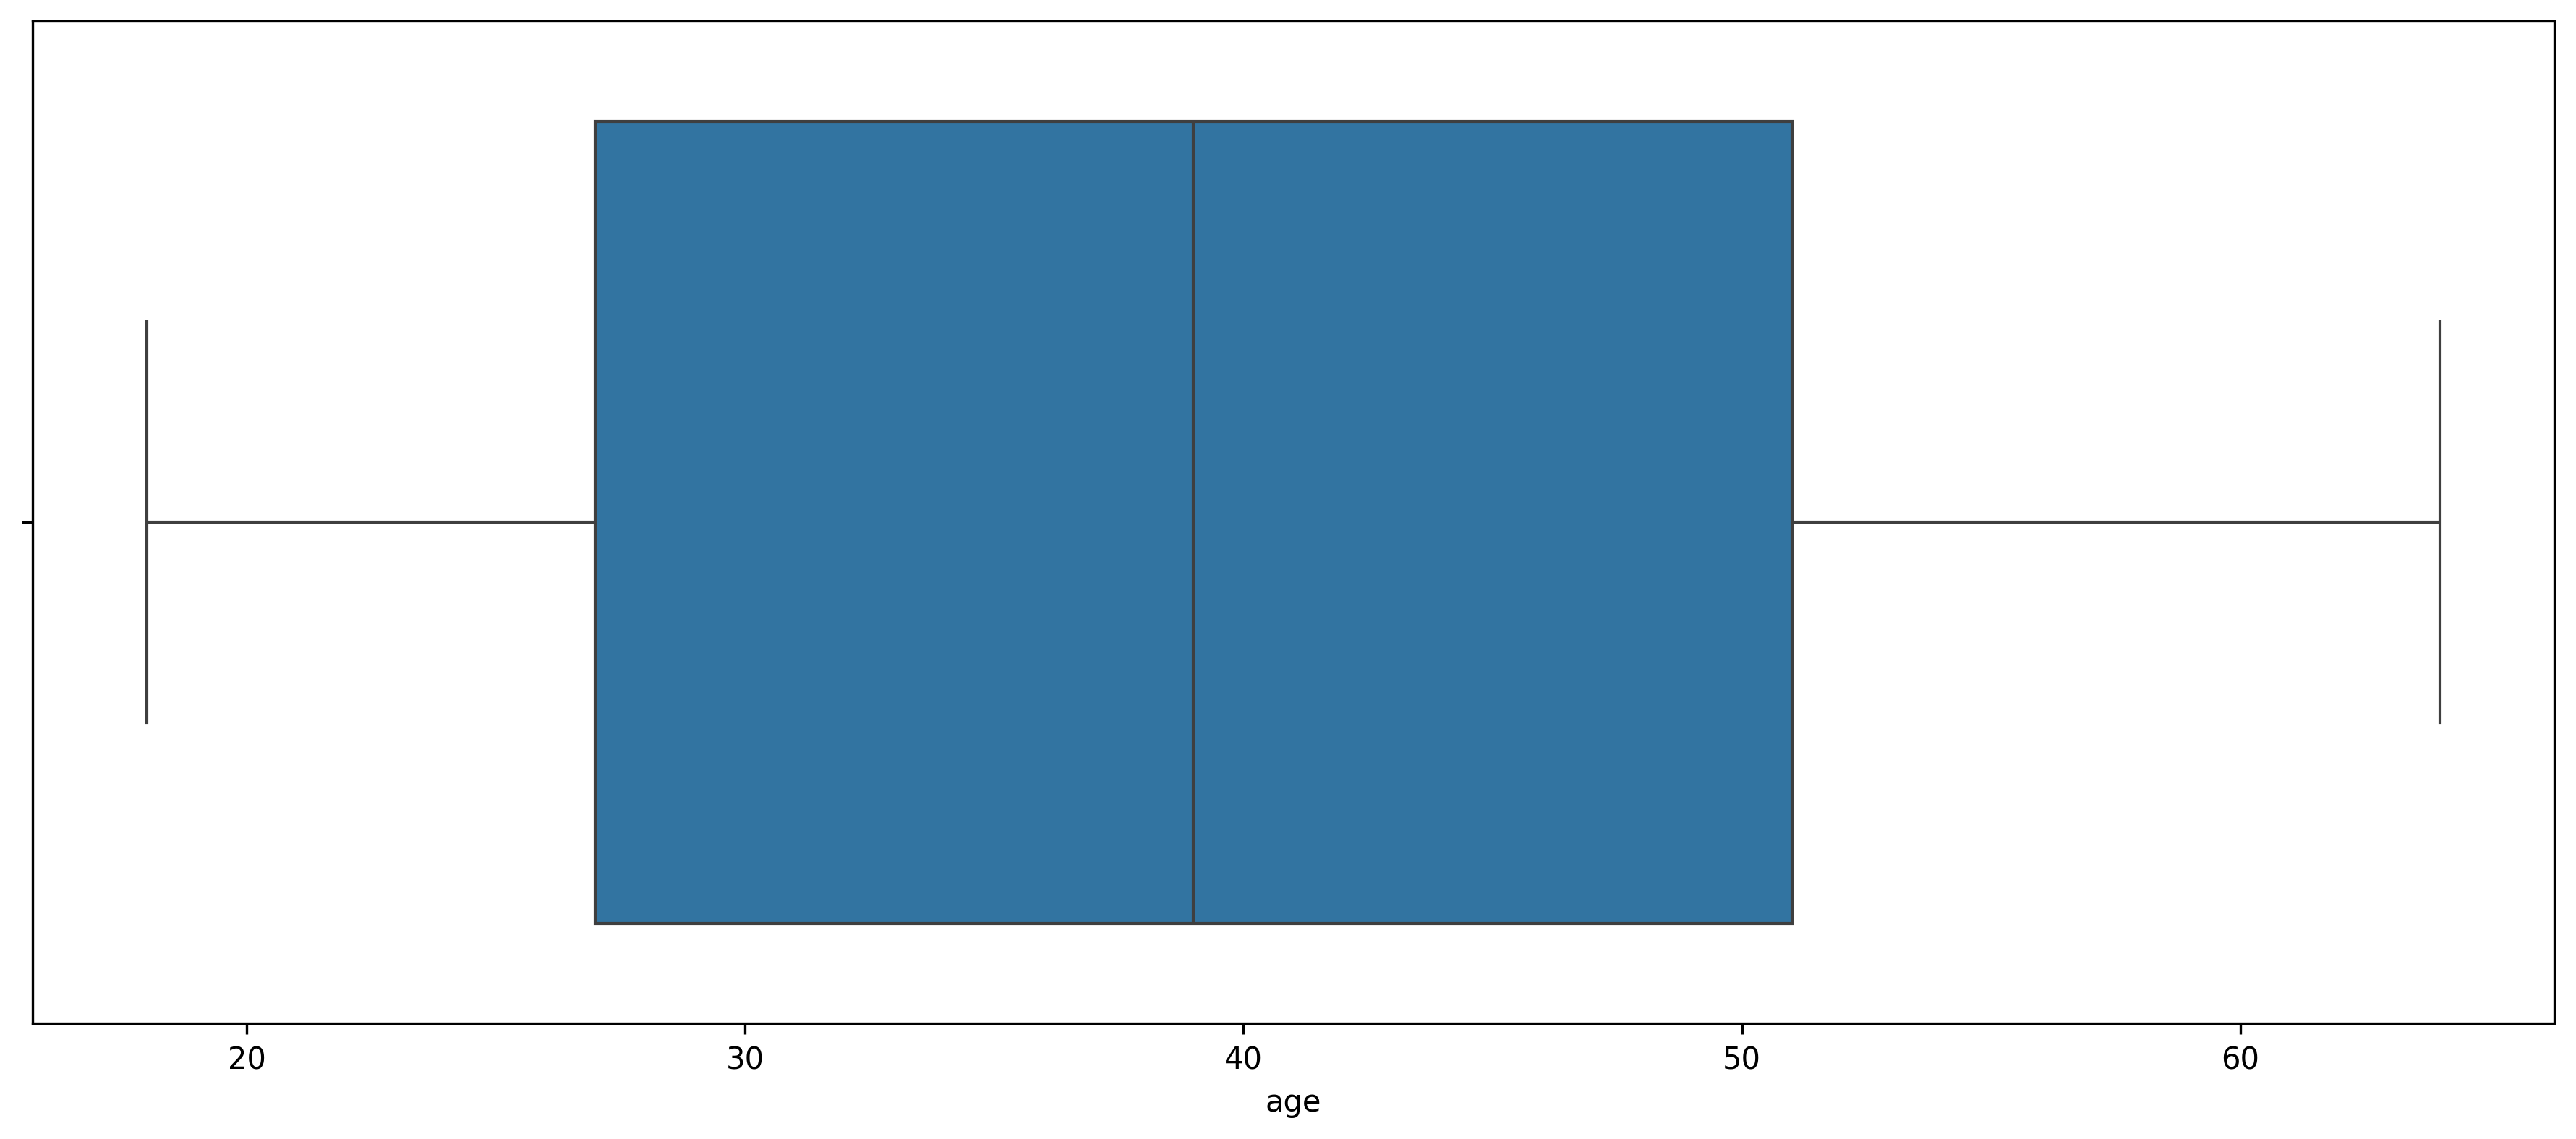

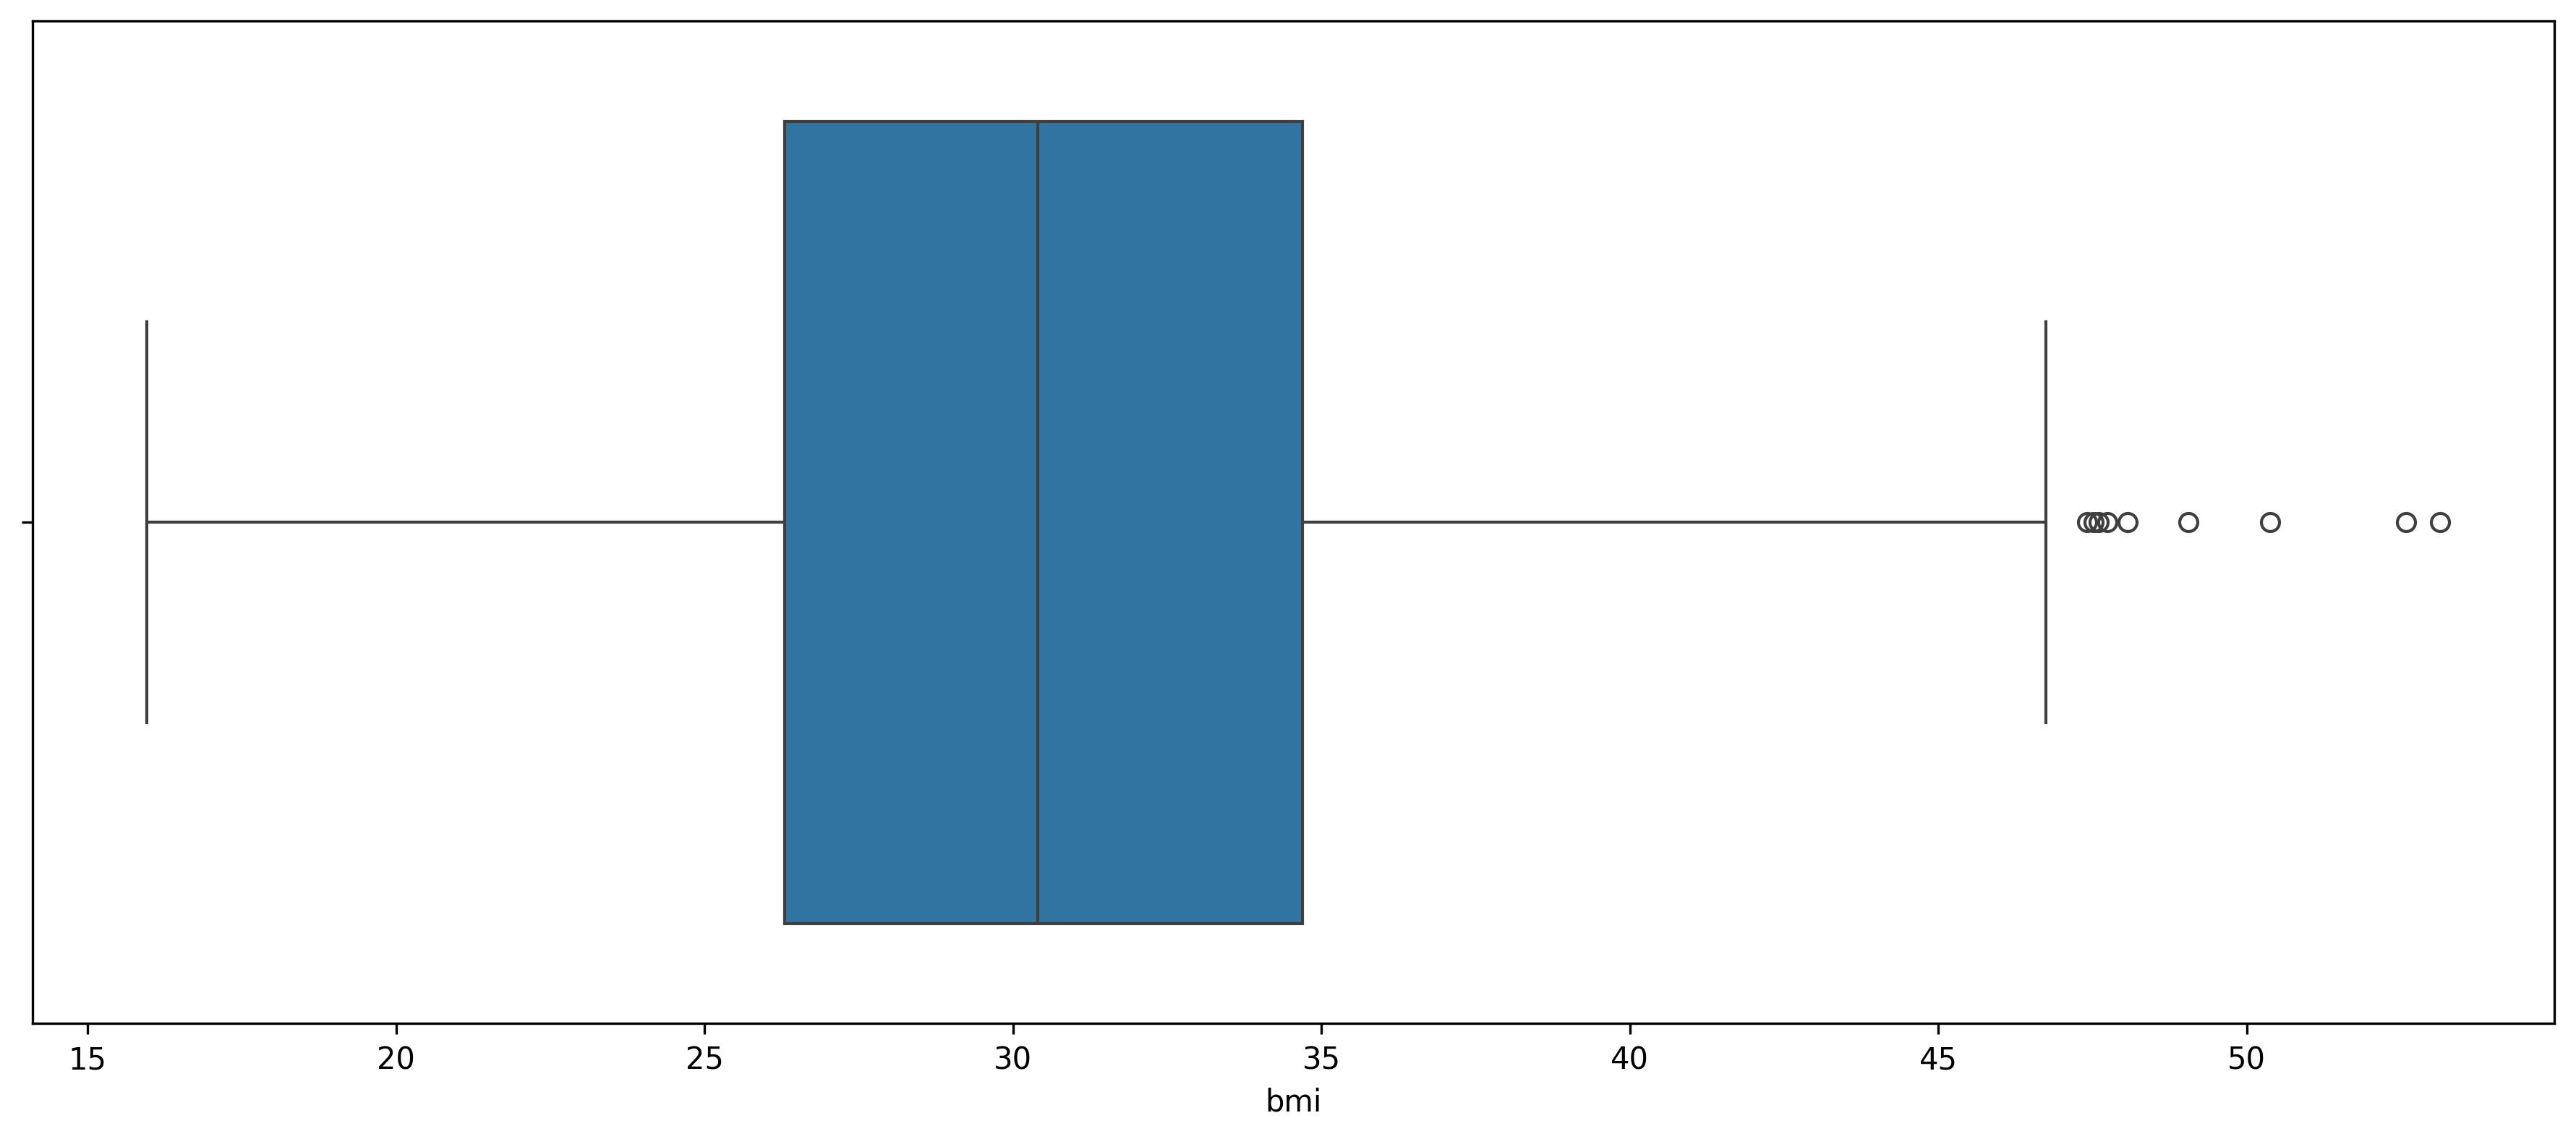

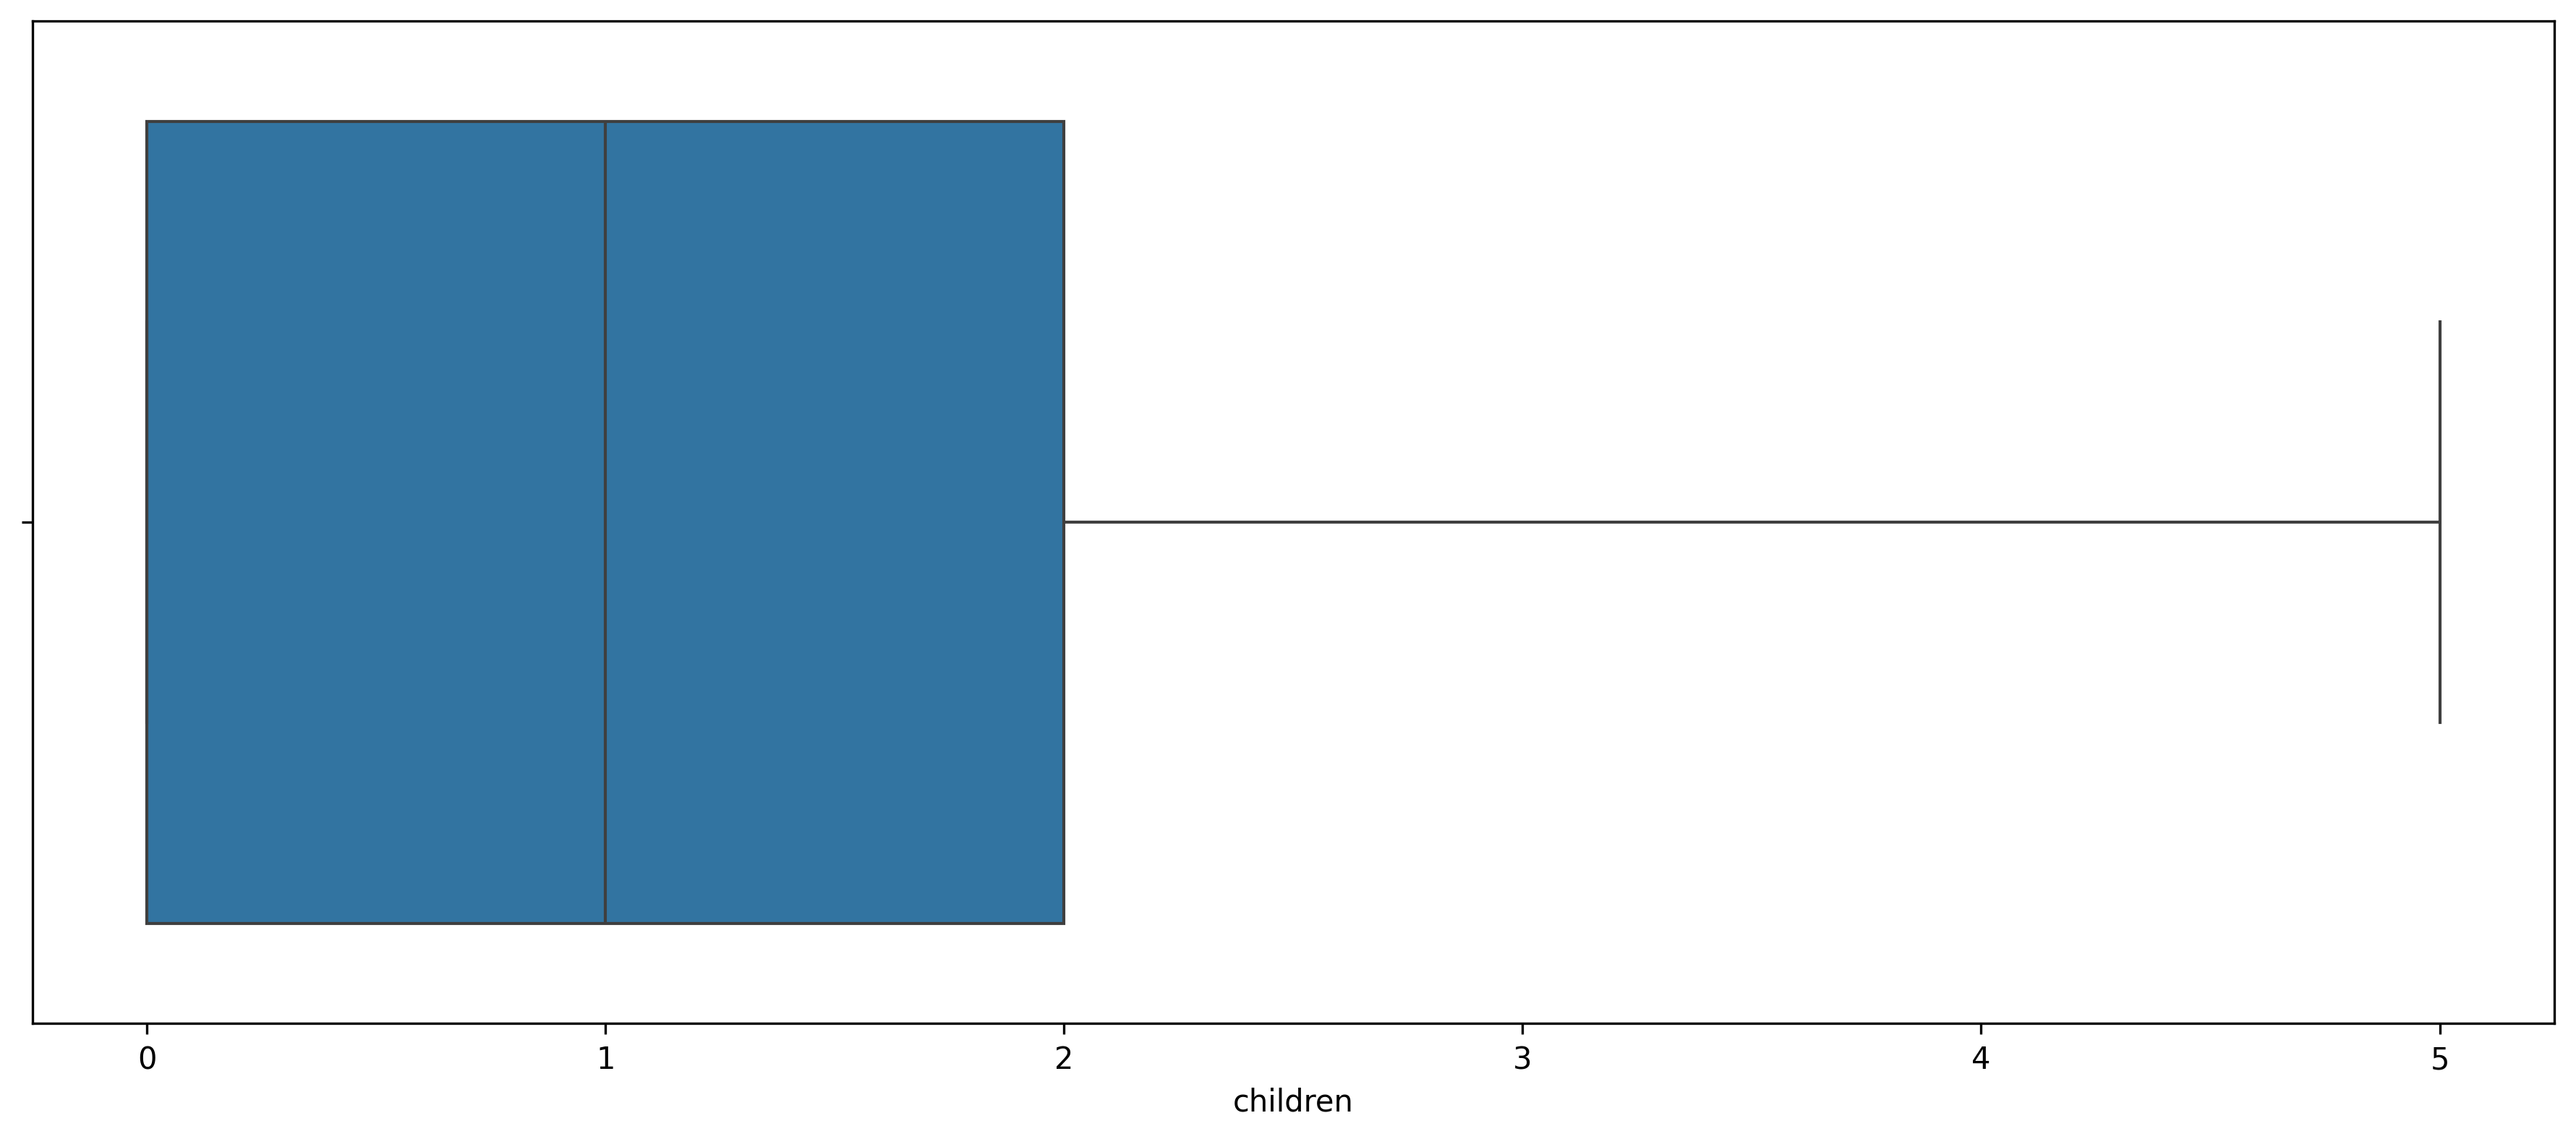

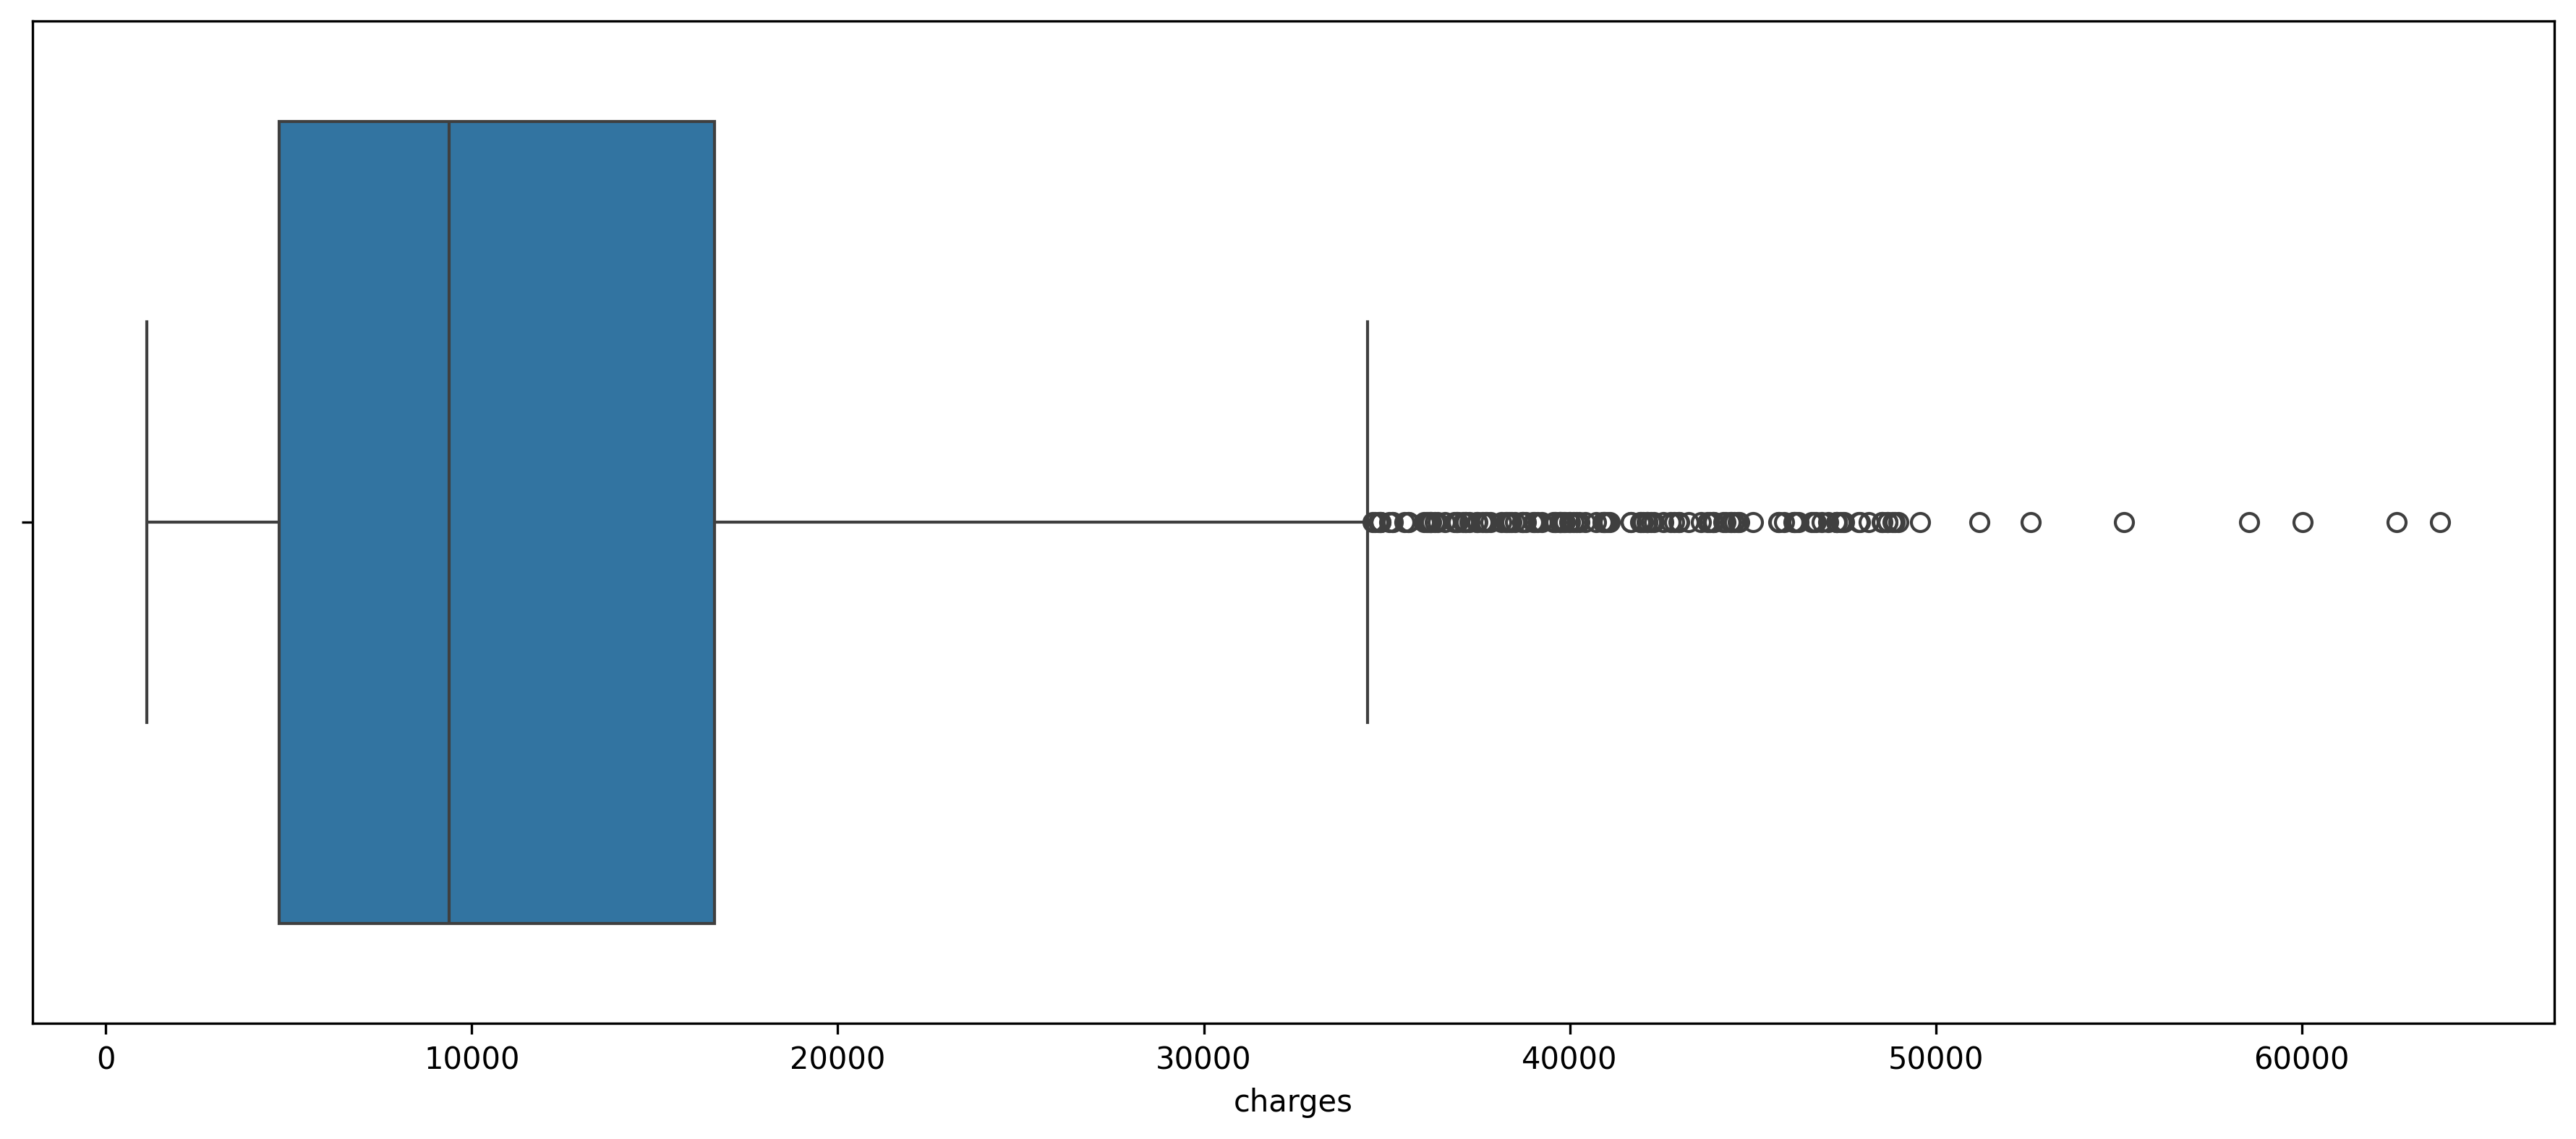

In [151]:
for col in numeric:
    plt.figure(figsize= (15,6),dpi=300,edgecolor='green')
    sns.boxplot(x = df[col])

<Axes: >

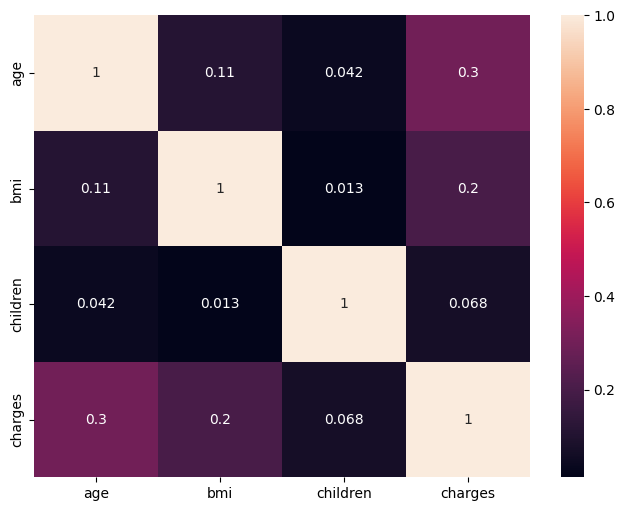

In [152]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='charges', ylabel='children'>

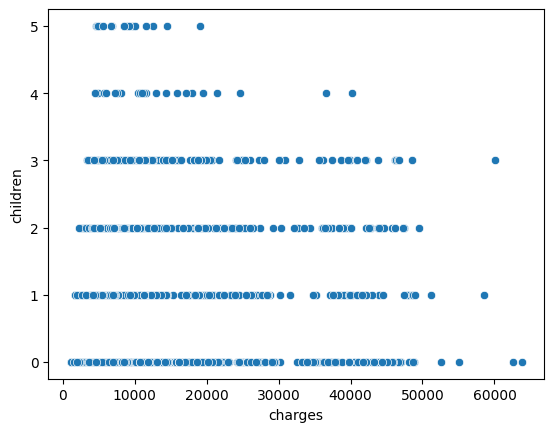

In [153]:
sns.scatterplot(data=df, x='charges', y='children')

# Data Cleaning and preprocessing

In [154]:
df_cleaned=df.copy()

In [155]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [156]:
df.shape

(1338, 7)

In [157]:
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [158]:
df_cleaned.drop_duplicates(inplace = True)
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [159]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [160]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [161]:
df_cleaned['sex'].unique()

array(['female', 'male'], dtype=object)

In [162]:
df_cleaned['sex']=df_cleaned['sex'].map({"male":1,"female":0})

In [163]:
df_cleaned.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061


In [164]:
df_cleaned['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [165]:
df_cleaned['smoker']=df_cleaned['smoker'].map({"yes":1,"no":0})

In [166]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [167]:
df_cleaned.rename(columns={'sex':'is_female','smoker':'is_smoker'},inplace=True)

In [168]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [169]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [170]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)

In [171]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [172]:
df_cleaned.astype(int)

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,1
1,18,1,33,1,0,1725,0,1,0
2,28,1,33,3,0,4449,0,1,0
3,33,1,22,0,0,21984,1,0,0
4,32,1,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0
1334,18,0,31,0,0,2205,0,0,0
1335,18,0,36,0,0,1629,0,1,0
1336,21,0,25,0,0,2007,0,0,1


# Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

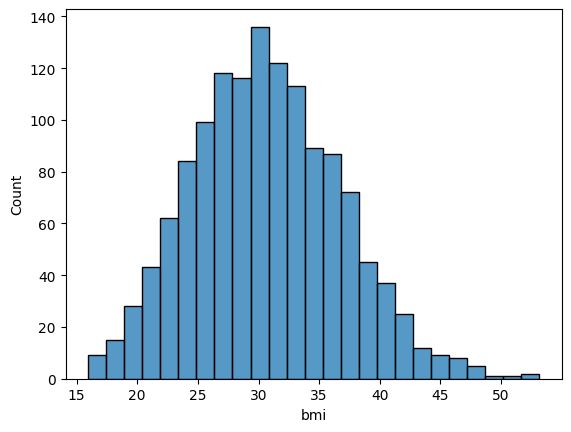

In [173]:
sns.histplot(data=df,x='bmi')

In [174]:
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'Obesity']
)

In [175]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,0,27.900,0,1,16884.92400,False,False,True,Overweight
1,18,1,33.770,1,0,1725.55230,False,True,False,Obesity
2,28,1,33.000,3,0,4449.46200,False,True,False,Obesity
3,33,1,22.705,0,0,21984.47061,True,False,False,Normal
4,32,1,28.880,0,0,3866.85520,True,False,False,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,True,False,False,Obesity
1334,18,0,31.920,0,0,2205.98080,False,False,False,Obesity
1335,18,0,36.850,0,0,1629.83350,False,True,False,Obesity
1336,21,0,25.800,0,0,2007.94500,False,False,True,Overweight


In [176]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category'],
      dtype='object')

In [177]:
df_cleaned = pd.get_dummies(df_cleaned,columns = ['bmi_category'],drop_first=True)

In [178]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obesity
0,19,0,27.900,0,1,16884.92400,False,False,True,False,True,False
1,18,1,33.770,1,0,1725.55230,False,True,False,False,False,True
2,28,1,33.000,3,0,4449.46200,False,True,False,False,False,True
3,33,1,22.705,0,0,21984.47061,True,False,False,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,True,False,False,False,False,True
1334,18,0,31.920,0,0,2205.98080,False,False,False,False,False,True
1335,18,0,36.850,0,0,1629.83350,False,True,False,False,False,True
1336,21,0,25.800,0,0,2007.94500,False,False,True,False,True,False


In [179]:
df_cleaned = df_cleaned.astype(int)

In [180]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obesity
0,19,0,27,0,1,16884,0,0,1,0,1,0
1,18,1,33,1,0,1725,0,1,0,0,0,1
2,28,1,33,3,0,4449,0,1,0,0,0,1
3,33,1,22,0,0,21984,1,0,0,1,0,0
4,32,1,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0,0,0,1
1334,18,0,31,0,0,2205,0,0,0,0,0,1
1335,18,0,36,0,0,1629,0,1,0,0,0,1
1336,21,0,25,0,0,2007,0,0,1,0,1,0


In [181]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight',
       'bmi_category_Obesity'],
      dtype='object')

In [182]:
from sklearn.preprocessing import StandardScaler

In [183]:
cols = ['age','bmi','children']
scaler = StandardScaler()

In [184]:
df_cleaned[cols]=scaler.fit_transform(df_cleaned[cols])

In [185]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obesity
0,-1.440418,0,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,1,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,1,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,1,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,1,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [186]:
from scipy.stats import pearsonr

# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obesity'
]

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_Obesity,0.197660
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
3,is_female,0.058046
5,region_northwest,-0.038695
7,region_southwest,-0.043637
8,bmi_category_Normal,-0.105656


In [189]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obesity'
]

In [190]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_Obesity,7.654464,0.05372,Accept Null (Drop Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Normal,4.263673,0.234364,Accept Null (Drop Feature)
bmi_category_Overweight,4.201575,0.240504,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [191]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges','region_southeast','bmi_category_Obesity']]

In [192]:
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obesity
0,-1.440418,0,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,1,0.462463,-0.079442,0,1725,1,1
2,-0.799350,1,0.462463,1.580143,0,4449,1,1
3,-0.443201,1,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,1,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,1,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,0,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,0,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,0,-0.844753,-0.909234,0,2007,0,0


In [193]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
